In [432]:
import numpy as np
import scipy.signal
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import *
import math

[0.39288310326603465, -0.13938451161663895, -1.3747345165941032, -1.2383544039304124, -1.143431027341748, -0.7648021530341829, 0.2205449239459657, 0.5943593966744007, 0.22731012730591538, 0.5718100330122213, -0.33826116682445373, -0.0627620663500405, -0.20776671607403485, -1.0861877513292222, -0.9707773170105729, -0.4494901602657615, -0.014203493404216005, -0.9083112410515021, -1.0665933733668123, -0.9117366942790548, -1.3697235311018403, -1.2922568809661465, -1.3139082605494548, -1.1191654599763228, -0.2587840197264788, -0.5064464587359739, -1.250354163070039, -1.3482362214623884, -0.7443014611127051, -0.3895847575375005, -0.9876114121484421, 0.02284058908948805, -0.5735382428879112, -0.8504117081631946, -0.17462714766203613, -0.9481607526671954, -0.2286990084097199, -0.17466336552910647, 0.35848743057995325, 1.842993537856987, 2.6185650884939116, 2.1790630316409114, 2.1777787845951924, 3.3881134244012263, 3.3428220735297254, 3.4580239613403707, 4.492174831162167, 4.505096917305151, 4

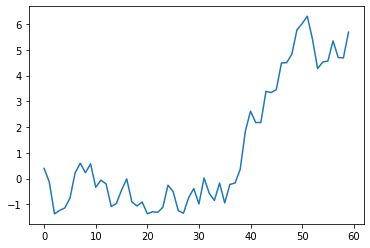

In [433]:
#海浪模拟
myN = 60
timeInterval = 1 #时间间隔
initX = 0 #初始尾椎
Amplitude = np.abs(np.random.randn(1,myN)) #幅值
waveAmplitude = []
Period = np.abs(np.random.randn(1,myN)) #周期
wavePeriod = []
Length = np.abs(np.random.randn(1,myN)) #波长
waveLength = []
Phase = np.abs(np.random.rand(1,myN)) * 2 * math.pi #初相位
initialPhase = []
myWave = 0
waveLine = []
for i in range(1):
    for j in range(myN):
        waveAmplitude.append(Amplitude[i][j])
        wavePeriod.append(Period[i][j])
        waveLength.append(Length[i][j])
        initialPhase.append(Phase[i][j])
for i in range(myN):
    myWave = myWave + waveAmplitude[i] * math.cos(2 * math.pi * initX / waveLength[i] - 2 * math.pi * timeInterval / wavePeriod[i] + initialPhase[i])
    waveLine.append(myWave)


    
plt.plot(waveLine)
print(waveLine)
vector = waveLine

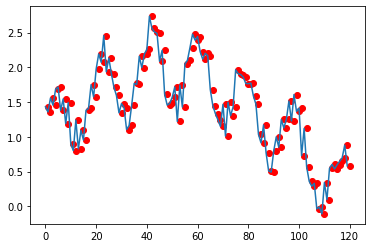

In [434]:
#y=1+0.5*SIN(x)+(RAND*0.2-0.1)+SIN(x/10)
pr = 120
x = [0] * pr
y = [0] * pr
for i in range(pr):
    x[i] = i + 1

for i in range(pr):
    y[i] = 1 + 0.5 * math.sin(x[i]/3) + math.sin(x[i]/30) + np.random.uniform(-0.3,0.3)
#y = 1 + 0.5 * math.sin(x) + math.sin(x/10) + np.random.uniform(0,0.2) - 0.1
plt.plot(y)
plt.scatter(x,y,c="r")
#vector = y

--WAVE HEIGHT
[1.969093913268504, 0.34449990570630595, 0.2754991004744132, 1.0719842579250063, 0.15485667908775747, 0.07746665013569376, 1.055124240822976, 0.958651463924888, 1.01045200123793, 0.6757845605011584, 3.566725841161107, 1.210334639806034, 2.9667117861236623, 1.0764956879150622]


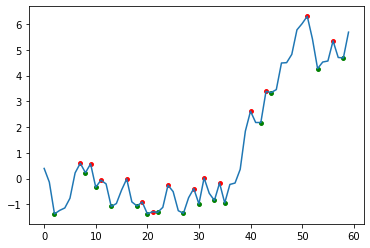

In [435]:
peakPositions = [] #[0] * len(vector)
valleys = []
diff_v = [0] * (len(vector) - 1)
trend = [0] * (len(vector) - 1)
for i in range(len(diff_v)):
    if vector[i + 1] - vector[i] > 0:
        diff_v[i] = 1;
    elif vector[i + 1] - vector[i] < 0:
        diff_v[i] = -1;
    else:
        diff_v[i] = 0;
trend = diff_v
#对trend作遍历
for i in range(len(diff_v)):
    if diff_v[i] == 0 and len(diff_v) - 1:
        diff_v[i] = 1;
    elif diff_v[i] == 0:
        if diff_v[i+1]>=0:
            diff_v[i] = 1
        else:
            diff_v[i] = -1
for i in range((len(diff_v) - 1)):
    if diff_v[i + 1] - diff_v[i] == -2:
        peakPositions.append(i+1)
    elif diff_v[i + 1] - diff_v[i] == 2:
        valleys.append(i+1)
#得到峰值
peakValue = []
valleyValue = []
for i in range(len(peakPositions)):
    peakValue.append(vector[peakPositions[i]])
for i in range(len(valleys)):
    valleyValue.append(vector[valleys[i]])

#浪高
waveHight = []
for i in range(len(peakValue)):
    waveHight.append(peakValue[i] - valleyValue[i])

print("--WAVE HEIGHT")
print(waveHight)
#print(peakValue)
#print(valleyValue)
#print(peakPositions)

x = np.linspace(0, 60, 50)
plt.plot(vector)
plt.scatter(peakPositions, peakValue, s=15, c='r')
plt.scatter(valleys, valleyValue, s=15, c='g')
sortedPeakValue = sorted(peakValue,reverse=True)
sortedValleyValue = sorted(valleyValue)

1.1797834646288796
0.9524793005098313
1
4
5.130095427156587


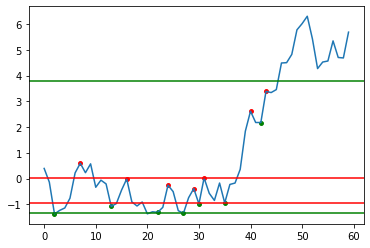

In [436]:
#第一次过滤
vpd = []
realWave = []
tempPeak = []
tempValley = []
realPeakPosition = []
realPeakValue = []
realValleyPosition = []
realValleyValue = []
count = 0

for i in range(len(peakValue) - 1):
    vpd.append(peakValue[i] - valleyValue[i])
    count = count + (peakValue[i] - valleyValue[i])
avg = count / (len(peakValue) - 1)
print(avg)
mediaPeakValue = np.median(peakValue)
mediaValleyValue = np.median(valleyValue)
print(mediaPeakValue - mediaValleyValue)

for i in range(len(vpd) - 1):
    if i == 1:
        continue
    #if vpd[i] >= 0.5 * (vpd[i-1] + vpd[i] + vpd[i+1]) / 3:
    if vpd[i] > 0.8 * avg:
        realWave.append(vpd[i])
        tempPeak.append(i)
        tempValley.append(i)
        
#筛选真实坐标
for i in range(len(peakPositions)):
    for j in range(len(tempPeak)):
        if i == tempPeak[j]:
            realPeakPosition.append(peakPositions[i])
            realPeakValue.append(peakValue[i])
        if i == tempValley[j]:
            realValleyPosition.append(valleys[i])
            realValleyValue.append(valleyValue[i])
plt.plot(vector)
plt.axhline(y=mediaPeakValue,c='r')
plt.axhline(y=mediaValleyValue,c='r')
plt.scatter(realPeakPosition, realPeakValue, s=15, c='r')
plt.scatter(realValleyPosition, realValleyValue, s=15, c='g')

#去掉1/10最高浪高，取前1/5 - 1/3 浪高作为有效浪高
#去掉1/10最低谷值，取后1/5 - 1/3位有效波谷

sortedPeakValue = sorted(peakValue,reverse=True)
sortedValleyValue = sorted(valleyValue)

count2 = 0
count3 = 0
len2 = (len(sortedPeakValue))/3
top = (len(sortedPeakValue))/10
print(int(top))
print(int(len2))
for i in range(int(len2)):
    if i < int(top):
        continue
    count2 = count2 + sortedPeakValue[i]
    count3 = count3 + sortedValleyValue[i]
peakheight = count2 / (int(len2) - int(top))
valleyheight = count3 / (int(len2) - int(top))
gwaveHeight = peakheight - valleyheight
print(gwaveHeight)

#每分钟潮高大概升高或降低一厘米，具体升降需要按照当地位置及时间区分
# 0-6 时 涨潮 6-12 时 退潮
# 0-9 时 退潮 9-12 时



plt.axhline(y=peakheight,c='g')
plt.axhline(y=valleyheight,c='g')

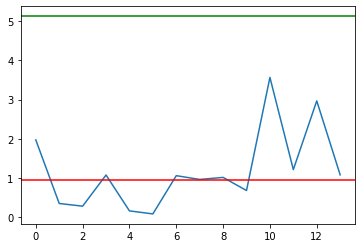

In [437]:
plt.plot(waveHight)
#plt.axhline(y=2.0709097574812945,c='g')
#plt.axhline(y=2.9023980567822223,c='r')
tempy = mediaPeakValue - mediaValleyValue

plt.axhline(y=tempy,c='r')
plt.axhline(y=gwaveHeight,c='g')

In [438]:
t = 0.336
m = 0.385
h = 0.278
yf = 1500
print(t*yf)
print(m*yf)
print(h*yf)

504.00000000000006
577.5
417.00000000000006
